# Telia Data Science Home Assingment: Customer Churning

Source for dataset: [Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data)

The dataset is focused on customer churn prediction in a telecommunication company.

## Dataset

The dataset contains following information:

**Churn Status:** Has a customer churned or not, target variable for predictive modeling.

**Services:** Services that each customer has signed up for, such as phone, internet, online security, streaming TV, etc.

**Customer Account Information:** Details about the customer's account, such as tenure, contract type, payment method, billing method, monthly charges, and total charges.

**Demographic Information:** Gender, age range, and whether the customer has
partners or dependents.

# 1. Setup and Loading Data

## Importing libraries

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import metrics
from sklearn.svm import SVC

from pycaret.classification import *

## Loading the dataset

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**Datatypes**

The raw data has 7043 rows and 21 columns (features), where 'Churn' column is the target.

Most of the variables are categorical, only tenure, MonthlyCharges and TotalCharges are numerical. However, the latest still has to be converted into a float type.

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

## Data quality assessment

**Missing values**

In [ ]:
# checking missing values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Duplicate rows**

In [ ]:
# check duplicate rows
duplicate_rows = df.duplicated()
df[duplicate_rows]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [ ]:
# count the distinct values of CHURN column
churn_counts = df['Churn'].value_counts()
churn_counts

No     5174
Yes    1869
Name: Churn, dtype: int64

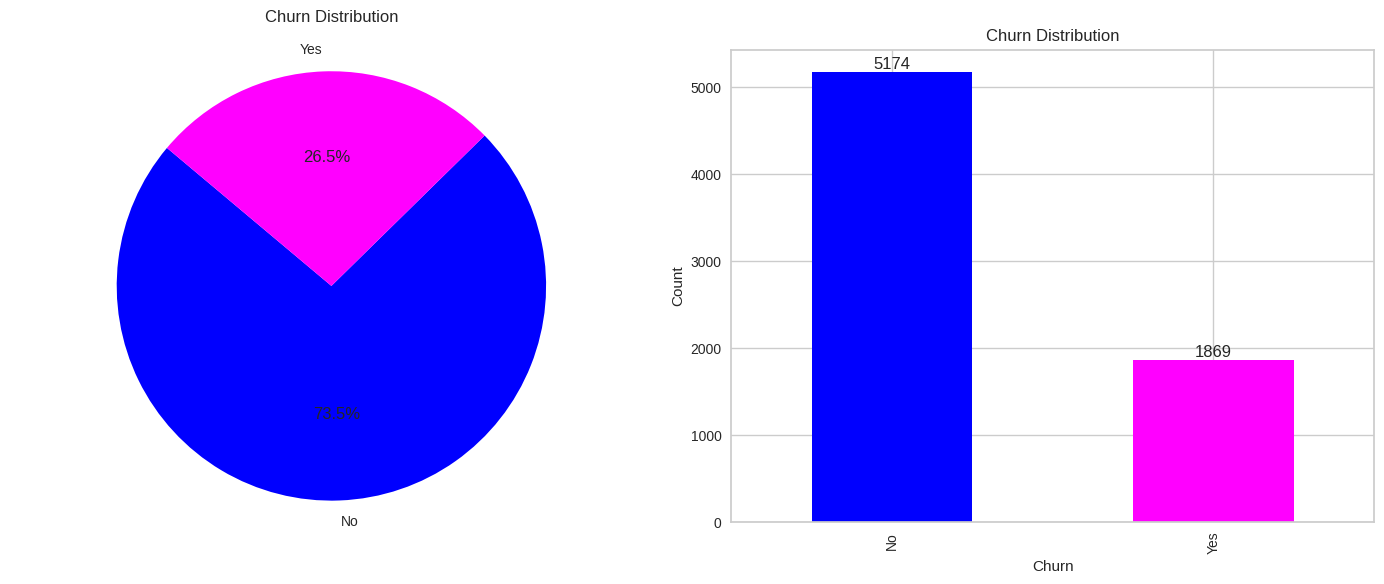

In [ ]:
# make a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

colors = ['blue', 'magenta', 'sienna']

# plott the pie chart
ax1.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Churn Distribution', pad=20)
ax1.axis('equal')

# plot the bar chart
churn_counts.plot(kind='bar', ax=ax2, color=colors)
ax2.set_title('Churn Distribution')
ax2.set_xlabel('Churn')
ax2.set_ylabel('Count')

# add text labels on the bars
for i, count in enumerate(churn_counts):
    ax2.text(i, count, str(count), ha='center', va='bottom')

plt.tight_layout()

plt.show()

# 2. Data Preprocessing

## Data Transformation

In [ ]:
# checking the empty spaces in column TotalCharges
empty_space = (df['TotalCharges'] == " ").sum()
empty_space

11

In [ ]:
# instead of replacing it with zero, it is replaced with the mean of TotalCharges column

# convert empty strings to NaN
df['TotalCharges'] = df['TotalCharges'].replace(" ", np.nan)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

mean_total_charges = df['TotalCharges'].mean()

# replace NaN values with the mean
df['TotalCharges'].fillna(mean_total_charges, inplace=True)

In [ ]:
# check again
empty_space2 = (df['TotalCharges'] == " ").sum()
empty_space2

0

In [ ]:
# check if TotalCharges column is a float type
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

## Data Exploration

In [ ]:
# create a dataframe for churned customers
churned_customers = df['Churn'] == 'Yes'
df_churned = df[churned_customers]

In [ ]:
# create a dataframe for not churned customers
not_churned_customers = df['Churn'] == 'No'
df_not_churned = df[not_churned_customers]

In [ ]:
df_churned['Churn'].value_counts()

Yes    1869
Name: Churn, dtype: int64

In [ ]:
df_not_churned['Churn'].value_counts()

No    5174
Name: Churn, dtype: int64

# 3. Data Analysis

## Churning based on demographics

In [ ]:
# defining the demographic columns
demographic_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

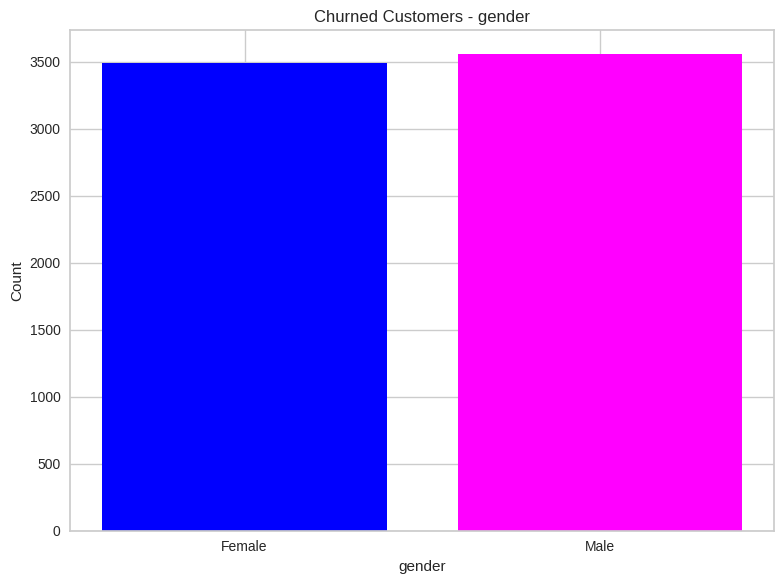

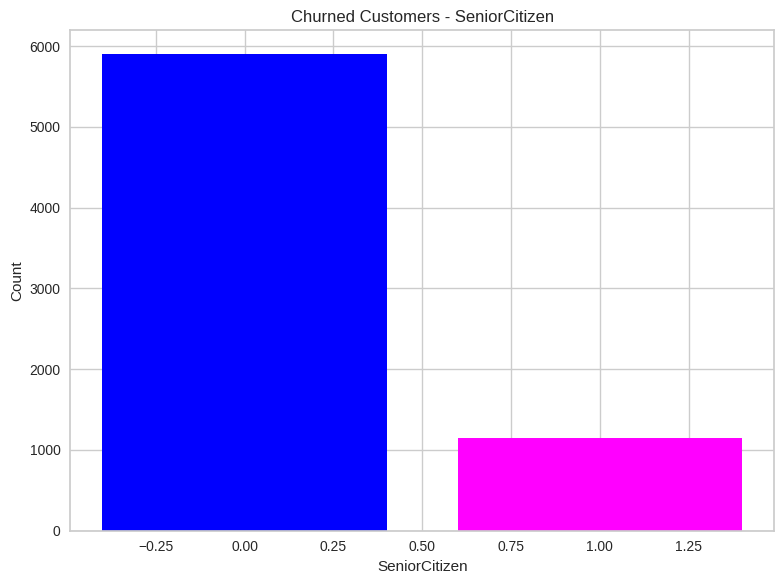

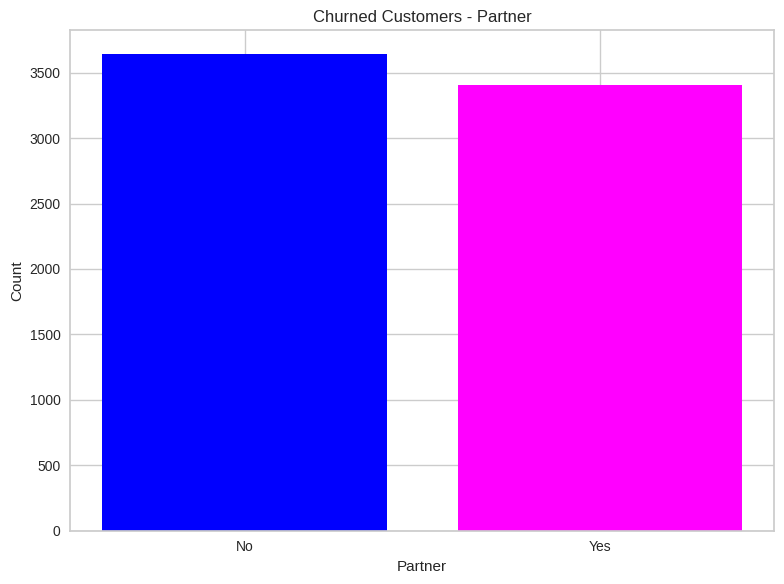

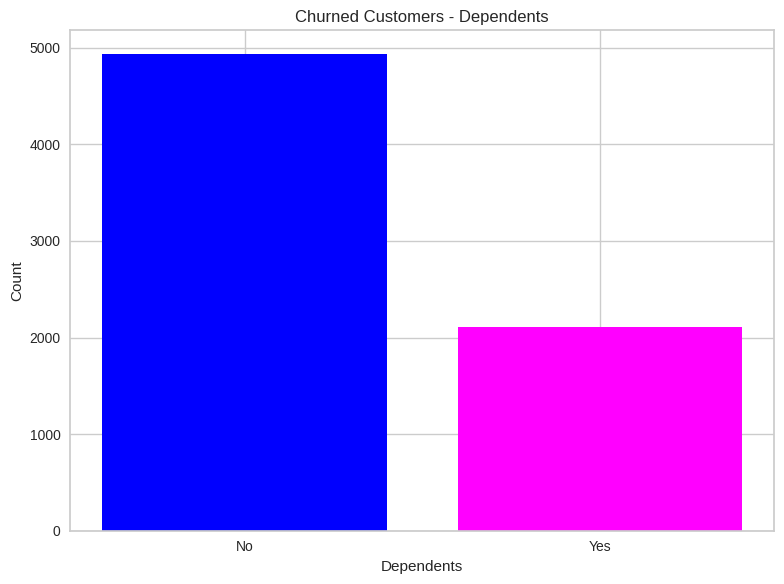

In [ ]:
for variable in demographic_variables:
    # group by the variable and count churn occurrences
    group_counts_churned = df.groupby(variable)['Churn'].count()

    # plotting the bar charts
    plt.figure(figsize=(8, 6))

    # bar chart for churned customers
    plt.bar(group_counts_churned.index, group_counts_churned.values, color=colors)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Churned Customers - {variable}')

    # adding text labels on the bars for churned customers
    for i, count in enumerate(group_counts_churned.values):
        axs[0].text(i, count, str(count), ha='center', va='bottom')

    # adjust layout
    plt.tight_layout()

    # show the plot
    plt.show()

**Inference**

* There is no significant difference between **male and female** customers.
* **Senior citizens** are less likely to churn.
* Customer is less likely to churn if they have a **partner**, however the difference is small.
* Customers who have **dependents**, are less likely to churn.

## Churning based on phone services

In [ ]:
# defining the service columns
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',]

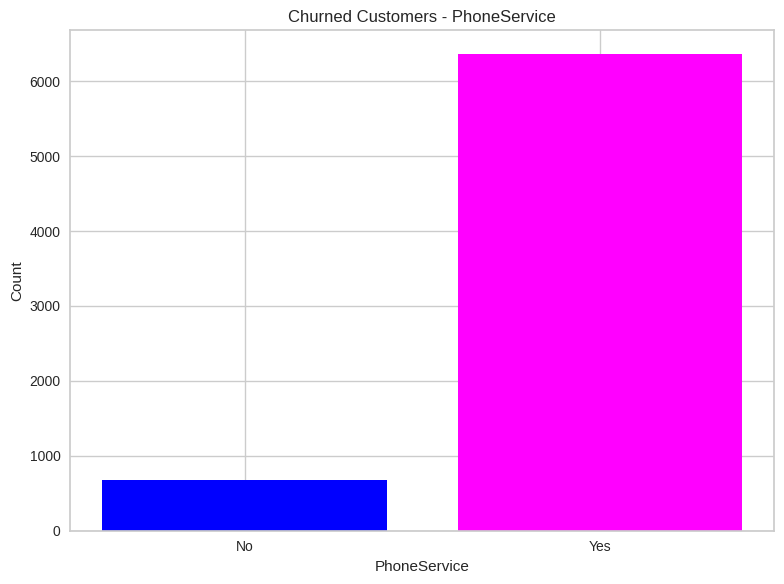

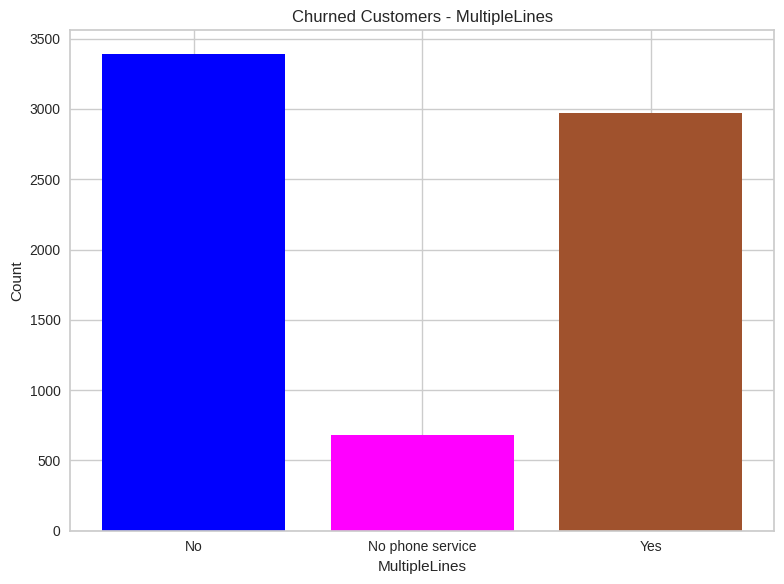

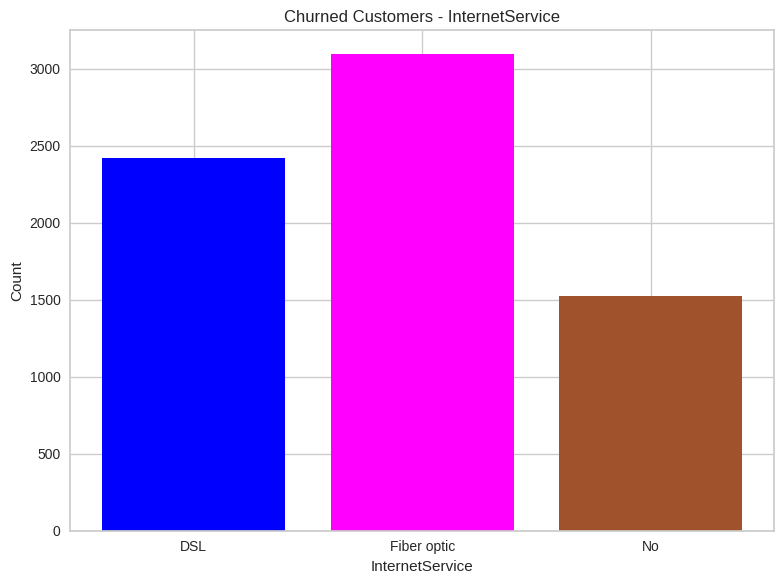

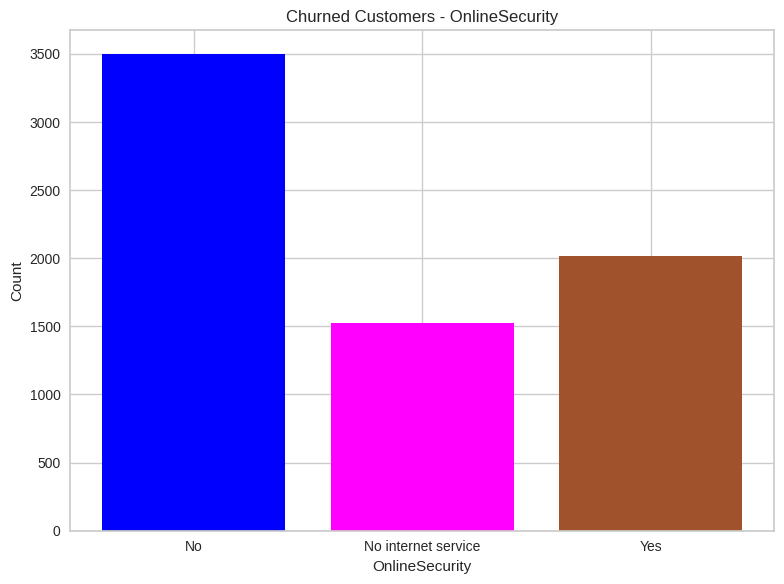

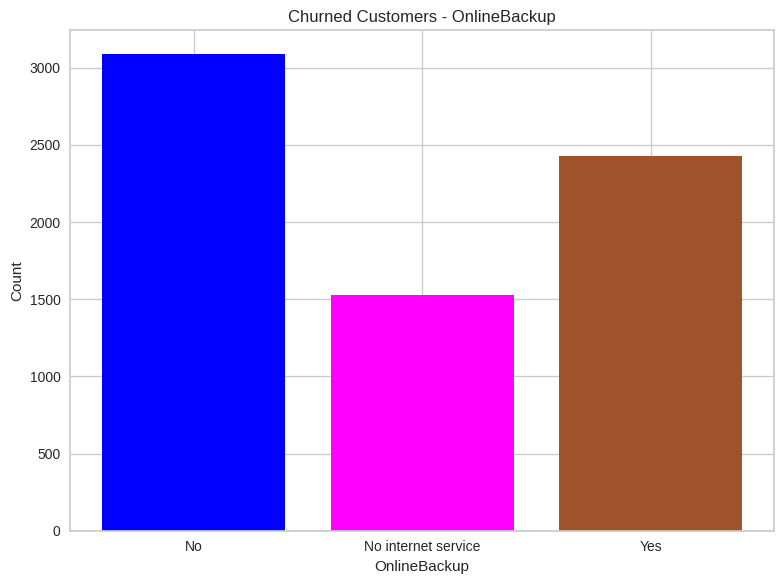

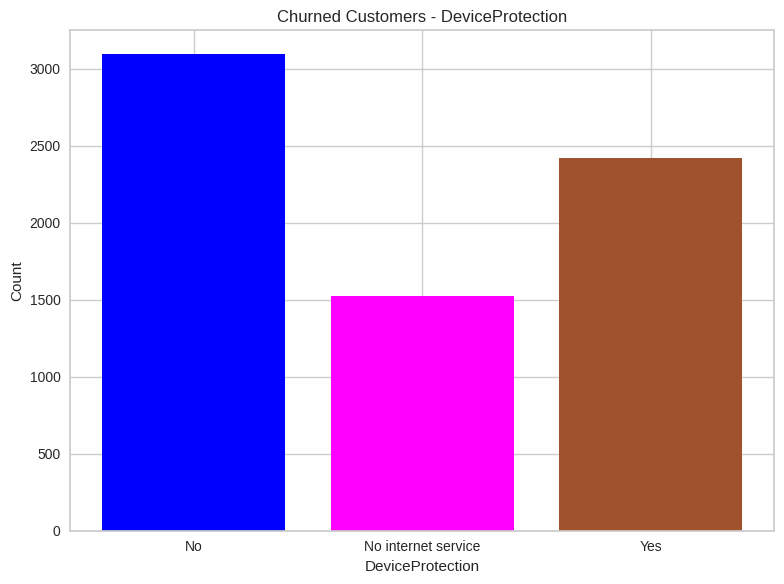

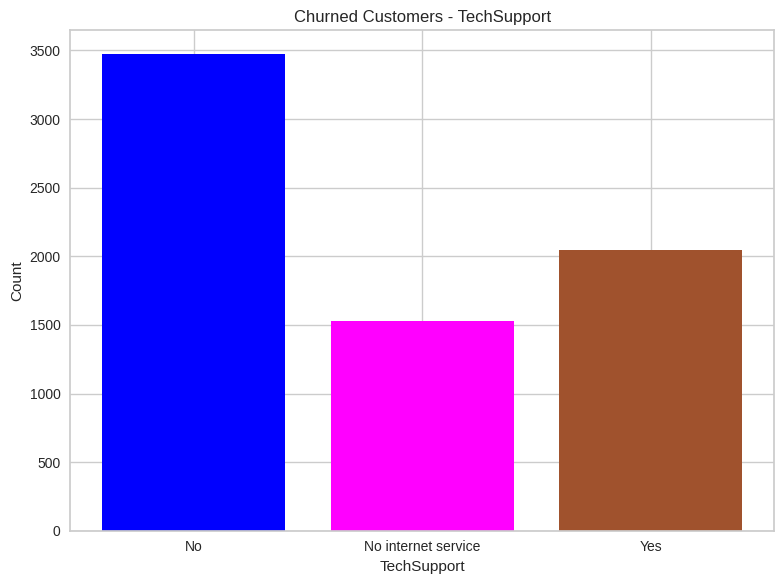

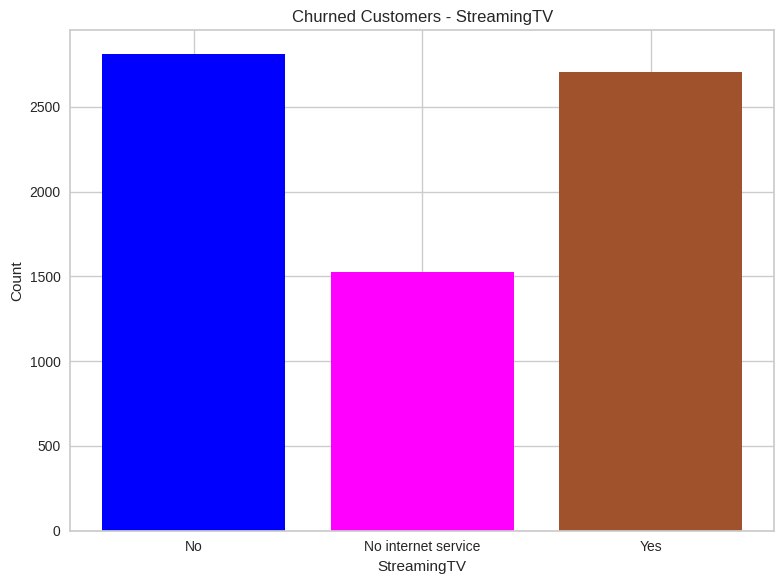

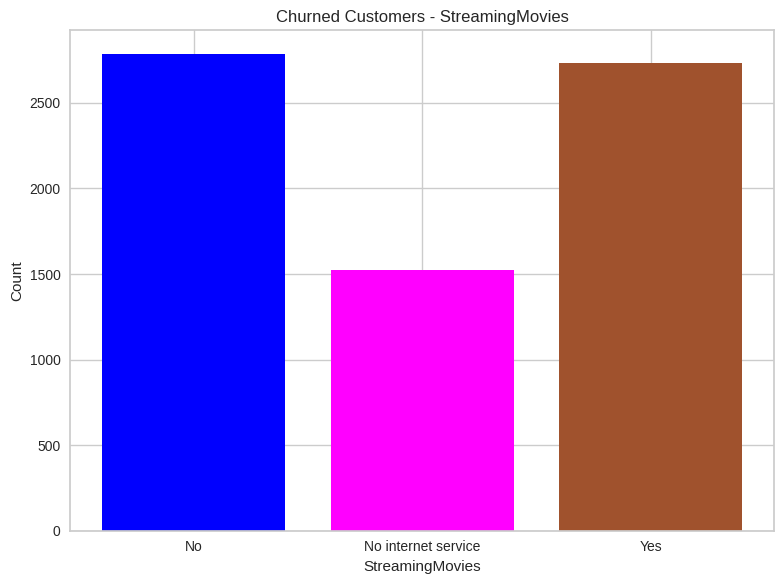

In [ ]:
for variable in services:
    # group by the variable and count churn occurrences
    group_counts_churned = df.groupby(variable)['Churn'].count()


    # plotting the bar charts
    plt.figure(figsize=(8, 6))

    # bar chart for churned customers
    plt.bar(group_counts_churned.index, group_counts_churned.values, color=colors)
    plt.xlabel(variable)
    plt.ylabel('Count')
    plt.title(f'Churned Customers - {variable}')

    # adding text labels on the bars for churned customers
    for i, count in enumerate(group_counts_churned.values):
        axs[0].text(i, count, str(count), ha='center', va='bottom')

    # adjust layout
    plt.tight_layout()

    # show the plot
    plt.show()

**Inference**

* Customers, who have a **phone service** are more likely to churn.
* Customers on **multiple lines** are less likely to churn.
* Customers with **internet service** are more likely to churn (less likely if they have DSL not Fiber optic).
* Customers, who have **online security** are less likely to churn.
* Customers, who have an **online backup** are less likely to churn-
* Customers with **device protection** are less likely to churn.
* Customers with **tech support** are less likely to churn.
* Customers, who have **streaming TV** are less likely to churn, however the difference is small.
* Customers, who have **streaming movies** are less likely to churn, however the difference is small.


## Churning based on tenure

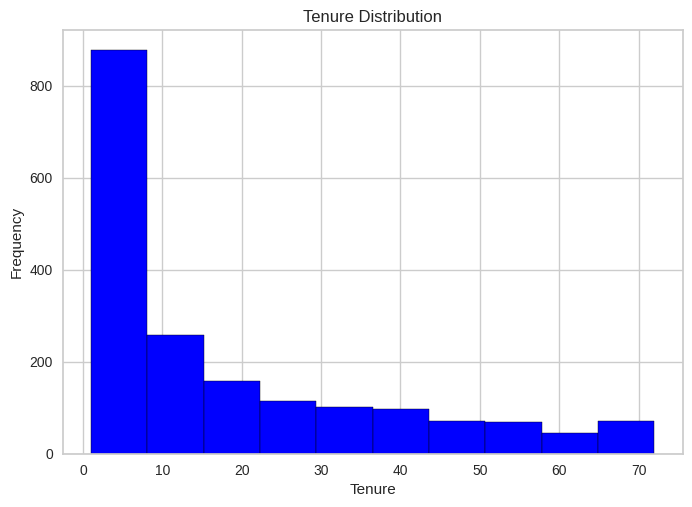

In [ ]:
# plotting the histogram
plt.hist(df_churned['tenure'], bins=10, color='blue', edgecolor='black')

# adding labels and title
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.title('Tenure Distribution')

# display the plot
plt.show()

**Inference**

* The longer a customer has been subscribed to the company, the less likely they are to churn.

## Churning based on the type of contract

In [ ]:
# grouping by 'Contract' and counting churn occurrences
contract = df_churned.groupby('Contract').count()['Churn']

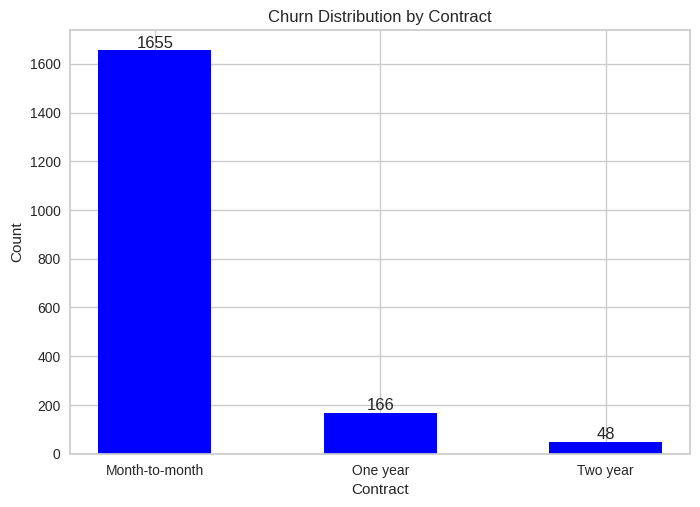

In [ ]:
# plotting the bar chart
plt.bar(contract.index, contract.values, width=0.5, color='blue')

# adding labels and title
plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Churn Distribution by Contract')

# adding text labels on the bars
for i, count in enumerate(contract.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# display the plot
plt.show()

**Inference**

* Customers are less likely to churn if they have a **one year** or a **two year** contract.

## Churning based on billing type

In [ ]:
# grouping by 'PaperlessBilling' and counting churn occurrences
billing = df_churned.groupby('PaperlessBilling').count()['Churn']

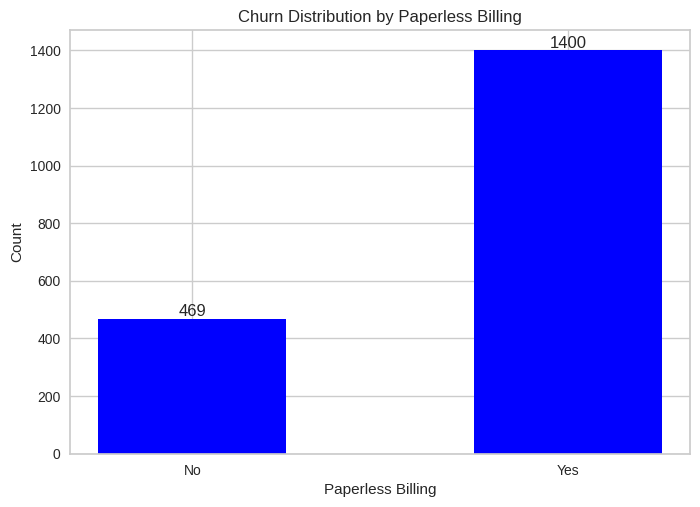

In [ ]:
# plotting the bar chart
plt.bar(billing.index, billing.values, width=0.5, color='blue')

# adding labels and title
plt.xlabel('Paperless Billing')
plt.ylabel('Count')
plt.title('Churn Distribution by Paperless Billing')

# adding text labels on the bars
for i, count in enumerate(billing.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# display the plot
plt.show()

**Inference**

* Customers are more likely to churn if they have a paperless billing method.

## Churning based on payment method

In [ ]:
# grouping by 'PaymentMethod' and counting churn occurrences
payment = df_churned.groupby('PaymentMethod').count()['Churn']

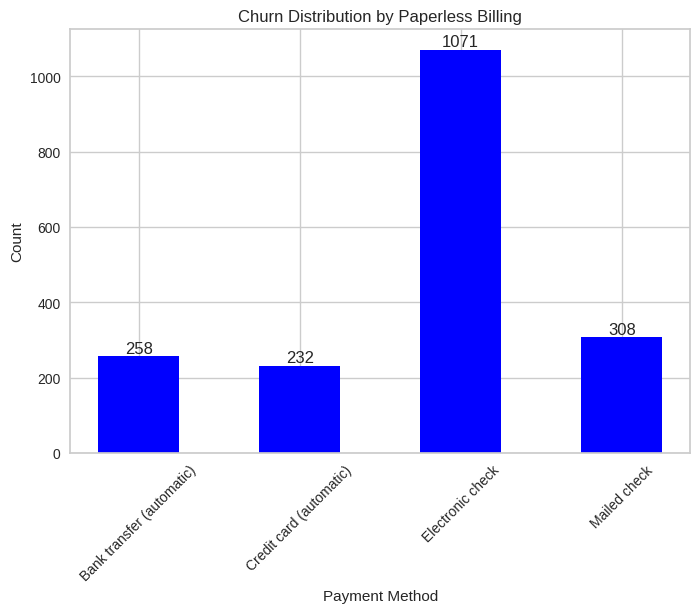

In [ ]:
# plotting the bar chart
plt.bar(payment.index, payment.values, width=0.5, color='blue')

# adding labels and title
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Churn Distribution by Paperless Billing')
plt.xticks(rotation=45)

# adding text labels on the bars
for i, count in enumerate(payment.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# display the plot
plt.show()

**Inference**

* Customers using an electronic check payment method are significantly more likely to churn.

## Churning based on monthly charges

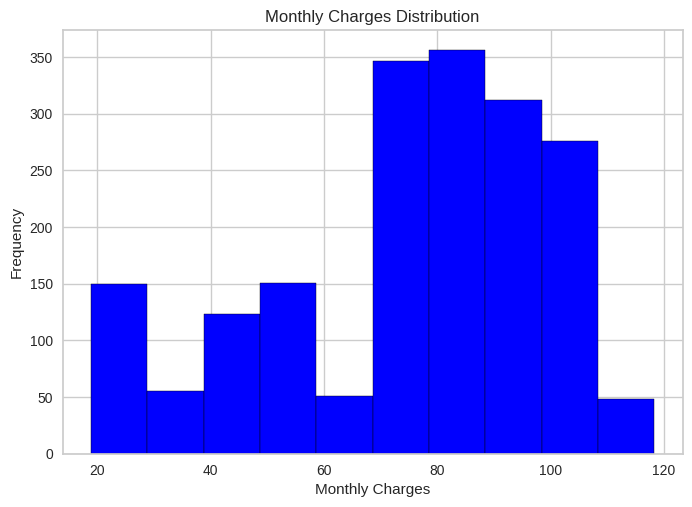

In [ ]:
# plotting the histogram with Matplotlib
plt.hist(df_churned['MonthlyCharges'], bins=10, color='blue', edgecolor='black')

# adding labels and title
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.title('Monthly Charges Distribution')

# display the plot
plt.show()

**Inference**

* Customers with montly charges between 70 to 110 are the most likely to churn.

# 4. ML Model

## Feature selection

The features are chosen based on the data exploration. Based on the analysis, these features have a significant effect on the customer churning.

In [ ]:
# select features and target variable
X = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                 'MonthlyCharges', 'TotalCharges']]  # features

y = df['Churn']  # target variable

## Encoding categorical variables

In [ ]:
# converting categorical to numerical
label_encoder = LabelEncoder()
for column in X.columns:
        X[column] = label_encoder.fit_transform(X[column])

y = label_encoder.fit_transform(y)

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Scaling

In [ ]:
# initializing standard scaler
sc = StandardScaler()

In [ ]:
# scaling the data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Logistic Regression

In [ ]:
# initializing logistic regression
lr = LogisticRegression()

In [ ]:
# training the model
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# predicting labels
y_pred = lr.predict(X_test)

In [ ]:
# calculating the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

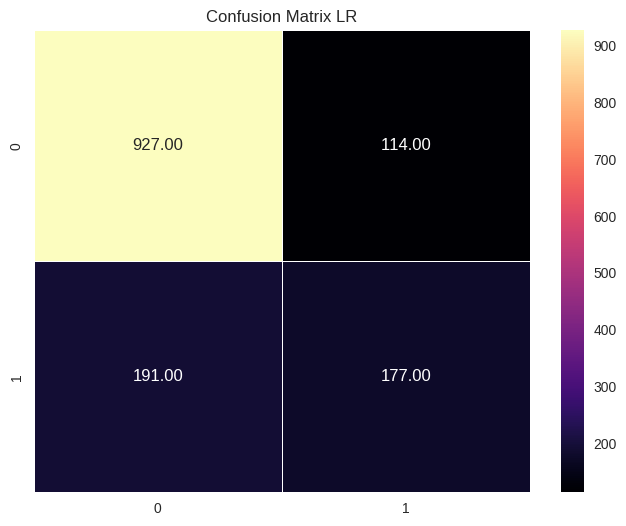

In [ ]:
# creating heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Confusion Matrix LR')
plt.show()

**Inference**

**True Positive** - 927: Number of cases where the model correctly predicts that a customer will churn.

**True Negative** - 177: Number of cases where the model correctly predicts that a customer will not churn.

**False Positive** - 114: Number of cases where the model incorrectly predicts that a customer will churn when they actually do not churn.

**False Negative** - 191: Number of cases where the model incorrectly predicts that a customer will not churn when they actually do churn.

In [ ]:
# calculating the accuracy
Accuracy = metrics.accuracy_score(y_test, y_pred)
Accuracy

0.7835344215755855

In [ ]:
# printing the predicted and actual labels
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 1]
 [0 0]
 [1 0]]


**Inference**

* Model correctly predicted the churn status for about 78.4% of the test data samples.
* Looking at the predicted labels compared to the actual labels, there is a mix of correct and incorrect predictions.

## Support vector classifier

In [ ]:
# initializing support vector classifier
svc = SVC(kernel='rbf', random_state=0)

In [ ]:
# training the model and predicting labels
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
# calculating the confusion matrix
confusion_matrix_svc = metrics.confusion_matrix(y_test, y_pred)

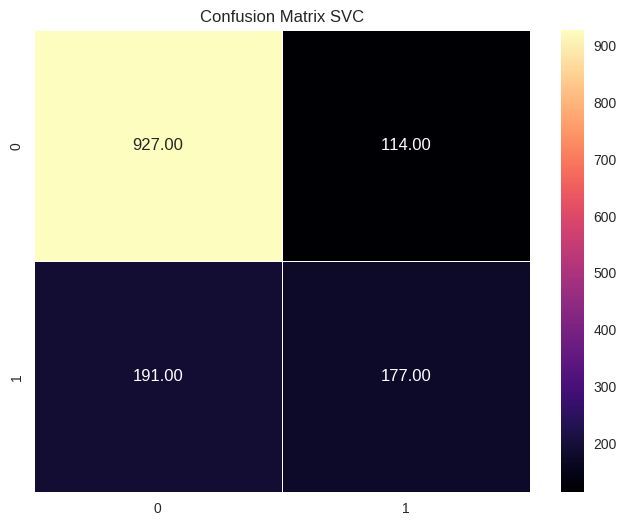

In [ ]:
# creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_svc, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)
plt.title('Confusion Matrix SVC')
plt.show()

**Inference**

* Since the accuracy is very similar to logistic regression, the confusion matrix is also the same.

**True Positive** - 927: Number of cases where the model correctly predicts that a customer will churn.

**True Negative** - 177: Number of cases where the model correctly predicts that a customer will not churn.

**False Positive** - 114: Number of cases where the model incorrectly predicts that a customer will churn when they actually do not churn.

**False Negative** - 191: Number of cases where the model incorrectly predicts that a customer will not churn when they actually do churn.

In [ ]:
# calculating the accuracy
Accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
Accuracy_svc

0.7899219304471257

**Inference**

* Model correctly predicted the churn status for about 79.0% of the test data samples.

## Comparing models with PyCaret

In [ ]:
# creating a dataframe with selected features
df_selected = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
                  'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [ ]:
# initializing the session
S = setup(df_selected, target='Churn', normalize=True, session_id=123)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 18)"
5,Transformed data shape,"(7043, 39)"
6,Transformed train set shape,"(4930, 39)"
7,Transformed test set shape,"(2113, 39)"
8,Numeric features,4
9,Categorical features,13


In [ ]:
# identifying the best models
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:17:59
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8030,0.0000,0.8030,0.7957,0.7976,0.4692,0.4725,2.0840
ridge,Ridge Classifier,0.8002,0.0000,0.8002,0.7908,0.7923,0.4517,0.4575,0.3250
svm,SVM - Linear Kernel,0.7803,0.0000,0.7803,0.7827,0.7747,0.4198,0.4304,0.4990
knn,K Neighbors Classifier,0.7509,0.0000,0.7509,0.7441,0.7465,0.3404,0.3420,0.3710
dt,Decision Tree Classifier,0.7209,0.0000,0.7209,0.7226,0.7214,0.2875,0.2880,0.4710
nb,Naive Bayes,0.6923,0.0000,0.6923,0.7969,0.7102,0.3795,0.4264,0.3260


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8030,0.0000,0.8030,0.7957,0.7976,0.4692,0.4725,2.0840
ada,Ada Boost Classifier,0.8022,0.0000,0.8022,0.7929,0.7944,0.4575,0.4632,0.6600
ridge,Ridge Classifier,0.8002,0.0000,0.8002,0.7908,0.7923,0.4517,0.4575,0.3250
gbc,Gradient Boosting Classifier,0.8002,0.0000,0.8002,0.7913,0.7927,0.4535,0.4590,1.1870
lda,Linear Discriminant Analysis,0.7974,0.0000,0.7974,0.7907,0.7927,0.4584,0.4607,0.3350
lightgbm,Light Gradient Boosting Machine,0.7897,0.0000,0.7897,0.7813,0.7835,0.4321,0.4355,0.7930
rf,Random Forest Classifier,0.7864,0.0000,0.7864,0.7757,0.7779,0.4137,0.4191,0.9820
svm,SVM - Linear Kernel,0.7803,0.0000,0.7803,0.7827,0.7747,0.4198,0.4304,0.4990
xgboost,Extreme Gradient Boosting,0.7787,0.0000,0.7787,0.7703,0.7728,0.4052,0.4080,0.4570
et,Extra Trees Classifier,0.7635,0.0000,0.7635,0.7532,0.7562,0.3600,0.3634,0.9780


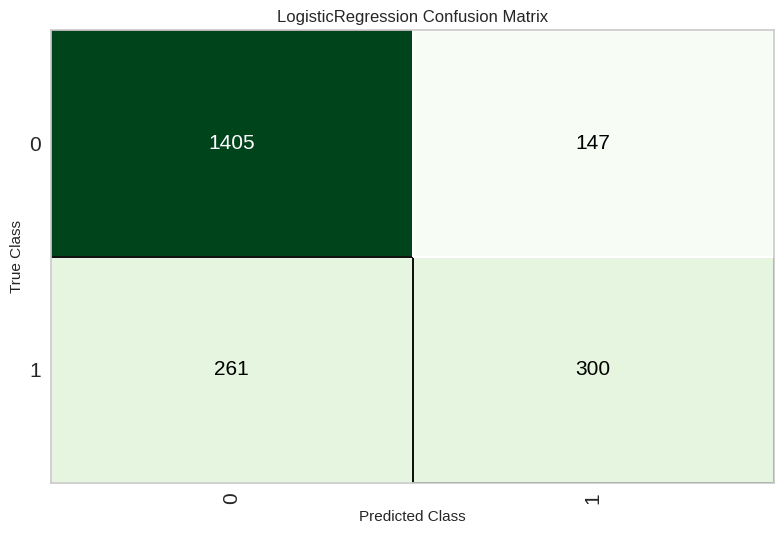

In [ ]:
# plotting the confusion matrix of LR
plot_model(best, plot='confusion_matrix')

**Inference**

**True Positive** - 1405: Number of cases where the model correctly predicts that a customer will churn.

**True Negative** - 300: Number of cases where the model correctly predicts that a customer will not churn.

**False Positive** - 147: Number of cases where the model incorrectly predicts that a customer will churn when they actually do not churn.

**False Negative** - 261: Number of cases where the model incorrectly predicts that a customer will not churn when they actually do churn.

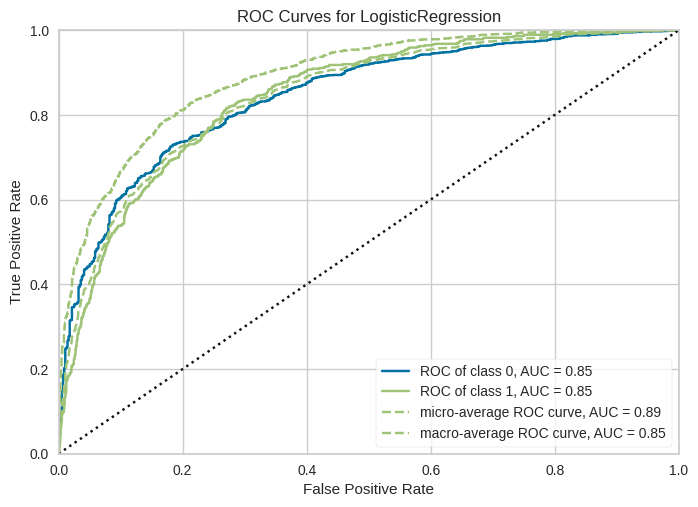

In [ ]:
# plotting the AUC
plot_model(best, plot='auc')

**Inference**

* With an AUC of 0.85, the model effectively balances the ability to correctly identify true positives while minimizing false positives.
* The high AUC value indicates that the model has good predictive performance

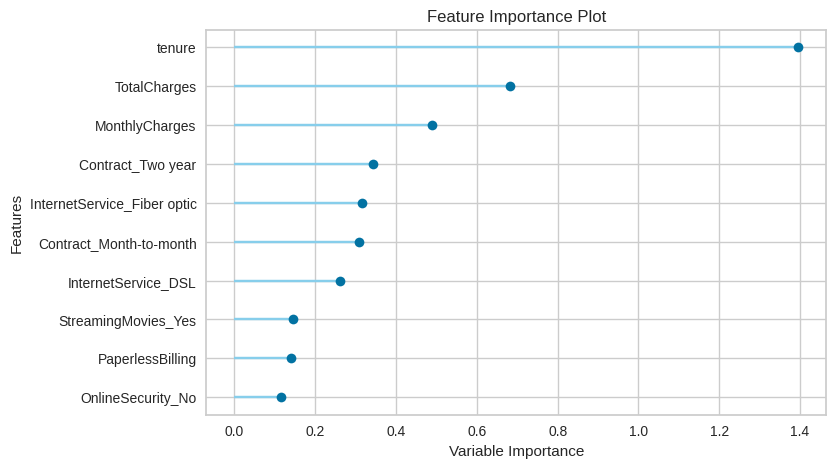

In [ ]:
# plotting the important features
plot_model(best, plot='feature')

**Inference**

* Since **"tenure"** is the most important feature, it means that the duration of the customer's subscription to the business plays a crucial role in predicting churn. Customers who have been with the company for longer durations may have different behavior compared to newer customers.

* **"total charges"** and **"monthly charges"** as important features show the significance of pricing and billing-related factors in predicting churn.
